## Observations and Insights 

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
study_df= pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
study_df["Mouse ID"].nunique()


249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= study_df.loc[(study_df.duplicated(["Mouse ID", "Timepoint"])==True), "Mouse ID"].reset_index()
del duplicate_mice["index"]
duplicate_mice= duplicate_mice["Mouse ID"].unique()[0]
duplicate_mice

'g989'

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
study_df[study_df["Mouse ID"] == duplicate_mice]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df= study_df.loc[(study_df["Mouse ID"] != "g989")]
clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [47]:
# Checking the number of mice in the clean DataFrame.
clean_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_reg= clean_study_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_reg_mean= drug_reg.groupby("Drug Regimen").mean()
drug_reg_median= drug_reg.groupby("Drug Regimen").median()
drug_reg_var= drug_reg.groupby("Drug Regimen").var()
drug_reg_std= drug_reg.groupby("Drug Regimen").std()
drug_reg_sem= drug_reg.groupby("Drug Regimen").sem()

drug_reg_mean= drug_reg_mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
drug_reg_median= drug_reg_median.rename(columns={"Tumor Volume (mm3)": "Median"})
drug_reg_var= drug_reg_var.rename(columns={"Tumor Volume (mm3)": "Variance"})
drug_reg_std= drug_reg_std.rename(columns={"Tumor Volume (mm3)": "Standard Dev."})
drug_reg_sem= drug_reg_sem.rename(columns={"Tumor Volume (mm3)": "SEM"})

drug_reg_summary_df = drug_reg_mean.join([drug_reg_median, drug_reg_var, drug_reg_std, drug_reg_sem])
drug_reg_summary_df


,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_reg= clean_study_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_reg_summary_df2= drug_reg.groupby("Drug Regimen").agg(["mean","median","var","std","sem"])
drug_reg_summary_df2 = drug_reg_summary_df2.rename(columns={"mean": "Mean","median":"Median","var":"Variance","std":"Standard Deviation","sem":"SEM" })
drug_reg_summary_df2


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_regimen = clean_study_df[["Drug Regimen","Mouse ID"]].groupby("Drug Regimen").count().reset_index()
mouse_regimen

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0.5, 1.0, 'Total number of mice tested for each drug regimen')

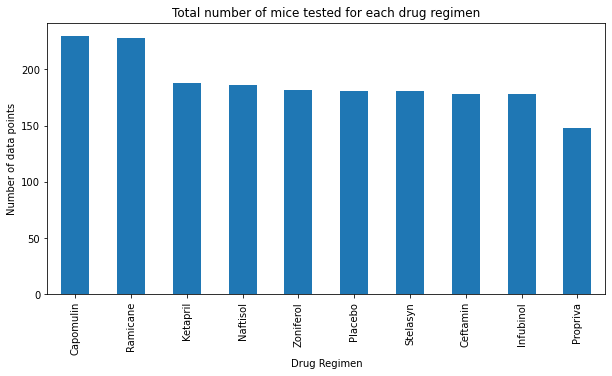

In [80]:
mouse_regimen= mouse_regimen.rename(columns={"Mouse ID":"Number of data points"})
mouse_regimen= mouse_regimen.sort_values(by="Number of data points", ascending= False)
MR= mouse_regimen.plot(kind="bar", x= "Drug Regimen",y= "Number of data points", figsize= (10,5), legend= None)

MR.set_xlabel(xlabel="Drug Regimen")
MR.set_ylabel(ylabel="Number of data points")
MR.set_title("Total number of mice tested for each drug regimen")

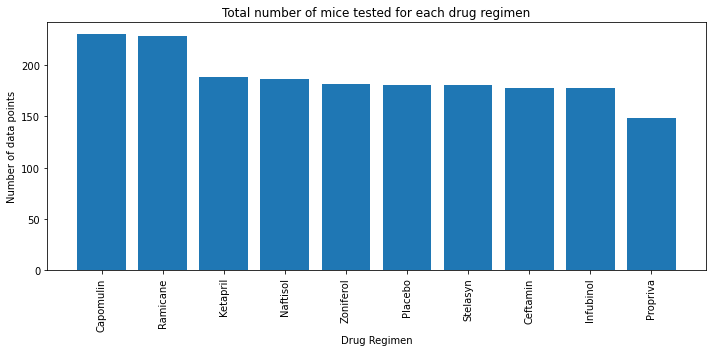

In [112]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mouse_regimen = clean_study_df[["Drug Regimen","Mouse ID"]].groupby("Drug Regimen").count().reset_index()
mouse_regimen= mouse_regimen.rename(columns={"Mouse ID":"Number of data points"})
mouse_regimen= mouse_regimen.sort_values(by="Number of data points", ascending= False)

plt.figure(figsize= (10,5))
plt.bar(mouse_regimen["Drug Regimen"], mouse_regimen["Number of data points"])

plt.xlabel(xlabel="Drug Regimen")
plt.ylabel(ylabel="Number of data points")
plt.title("Total number of mice tested for each drug regimen")
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of female versus male mice')

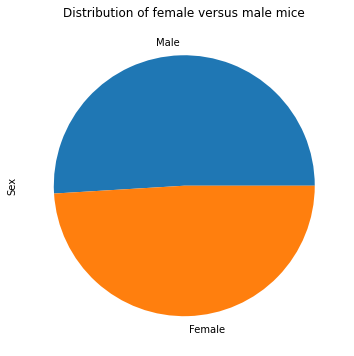

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_study_df["Sex"].value_counts()
mouse_sex= pd.DataFrame(mouse_sex)

pie_ms= mouse_sex.plot.pie(y="Sex",figsize= (6,6), legend= None)

pie_ms.set_title("Distribution of female versus male mice")

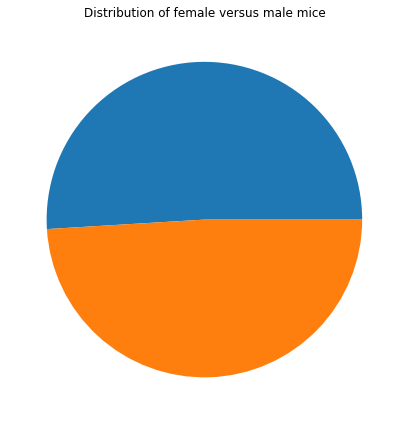

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, axis = plt.subplots(figsize = (6, 6))

mouse_sex = clean_study_df["Sex"].value_counts()
mouse_sex = pd.DataFrame(mouse_sex).reset_index()

axis.pie(mouse_sex["Sex"])

plt.title(label = "Distribution of female versus male mice")
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

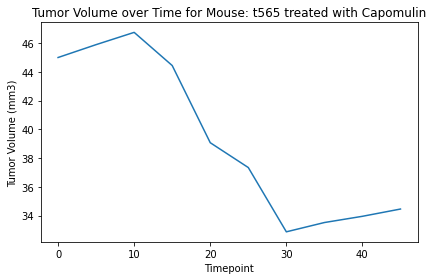

In [118]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mice = clean_study_df[clean_study_df['Drug Regimen'] == 'Capomulin']

capomulin_mice_ls = capomulin_mice.drop_duplicates(subset = 'Mouse ID')
capomulin_mice_ls = capomulin_mice_ls['Mouse ID'].tolist()

one_mouse = random.choice(capomulin_mice_ls)
chosen_mouse_df = clean_study_df[clean_study_df['Mouse ID'] == one_mouse]

xchosen = chosen_mouse_df['Timepoint']
ychosen = chosen_mouse_df['Tumor Volume (mm3)']


plt.plot(xchosen,ychosen)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume over Time for Mouse: {one_mouse} treated with Capomulin')

plt.tight_layout()
plt.show()

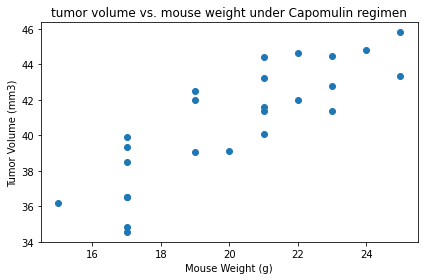

In [119]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = capomulin_mice.groupby('Mouse ID')
yscatter = capomulin_df['Tumor Volume (mm3)'].mean()
xscatter = capomulin_df['Weight (g)'].mean()
plt.scatter(xscatter,yscatter)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('tumor volume vs. mouse weight under Capomulin regimen')
plt.tight_layout()
plt.show()


## Correlation and Regression

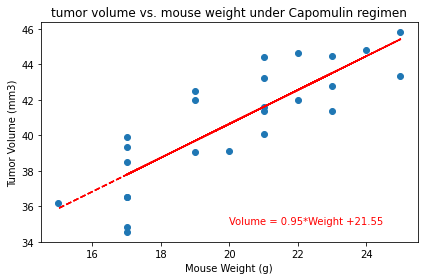

Correlation coeffecient [R-Value] is 0.84


In [128]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, _, _) = st.linregress(xscatter,yscatter)
fit = slope*xscatter+intercept

plt.scatter(xscatter, yscatter)
plt.plot(xscatter, fit ,"--", color = "red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('tumor volume vs. mouse weight under Capomulin regimen')

plt.annotate(f'Volume = {round(slope,2)}*Weight +{round(intercept,2)}',[20,35], color = 'red')

plt.tight_layout()
plt.show()
print(f'Correlation coeffecient [R-Value] is {round(rvalue,2)}')
